Instalar e importar biblioteca que implementa heaps (filas de prioridade) e árvores binárias de busca

In [67]:
#%pip install binarytree --upgrade

In [68]:
#from binarytree import tree

Função para ler o arquivo .stp e traduzir para uma estrutura de dicionário representando um grafo

In [69]:
import os

def read_stp(filename):
    graph = {}
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('E '):
                data = line.strip().split()
                node1 = int(data[1])
                node2 = int(data[2])
                cost = float(data[3])
                if node1 not in graph:
                    graph[node1] = []
                if node2 not in graph:
                    graph[node2] = []
                graph[node1].append((node2, cost))
                graph[node2].append((node1, cost))
    return graph

In [70]:
import timeit
from time import time_ns
import psutil
import os

def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

Código que lê os grafos de árvore binária de busca para o algoritmo de Prim

In [71]:
from collections import defaultdict

# Prim's algorithm to find MST
def prim(graph):
    mem_before = process_memory() #Pega a memória inicial
    visited = set()  # Set to keep track of visited nodes
    mst = defaultdict(dict)  # Dictionary to store the MST
    start_node = list(graph.keys())[0]  # Start from any node

    # Priority queue to store edges with weights
    priority_queue = [(start_node, None, 0)]

    while priority_queue:
        node, parent, weight = priority_queue.pop(0)  # Get the edge with the lowest weight
        if node not in visited:
            visited.add(node)  # Mark the current node as visited
            if parent is not None:
                mst[parent][node] = weight  # Add the edge to the MST
                mst[node][parent] = weight
            for neighbor, edge_weight in graph[node]:
                if neighbor not in visited:
                    priority_queue.append((neighbor, node, edge_weight))  # Add neighboring edges to the priority queue
            priority_queue.sort(key=lambda x: x[2])  # Sort the priority queue based on edge weights
    mem_after = process_memory() #Pega a memória final
    mem_used = mem_after - mem_before  #Calcula a memória consumida em bytes
    return mst,mem_used

# Example input graphs as dictionaries
graph1 = {
    'A': [('B', 2), ('C', 1)],
    'B': [('A', 2), ('D', 3), ('E', 1)],
    'C': [('A', 1)],
    'D': [('B', 3)],
    'E': [('B', 1)]
}

graph2 = {
    'A': [('B', 2), ('C', 3)],
    'B': [('A', 2), ('C', 1), ('D', 1)],
    'C': [('A', 3), ('B', 1), ('D', 2)],
    'D': [('B', 1), ('C', 2)]
}

# Find MST for graph1 and graph2
mst1 = prim(graph1)
mst2 = prim(graph2)

def print_mst(mst):
    for node, edges in mst.items():
        print(f"Node {node}:")
        for neighbor, weight in edges.items():
            print(f"  -> Neighbor {neighbor}, Weight {weight}")

print("Minimum Spanning Tree 1:")
if not mst1:
    print("MST 1 is empty.")
else:
    print_mst(mst1)

print("\nMinimum Spanning Tree 2:")
if not mst2:
    print("MST 2 is empty.")
else:
    print_mst(mst2)


Minimum Spanning Tree 1:


AttributeError: 'tuple' object has no attribute 'items'

Tentar conectar o código acima com o outro código que faz a leitura das entradas .stp

In [ ]:
filename = '/content/alue2087.stp'
example_graph = read_stp(filename)
print(example_graph)
mst_for_example_graph = prim(example_graph)

print("Minimum Spanning Tree for example_graph:")
if not mst_for_example_graph:
    print("MST for example_graph is empty.")
else:
    print_mst(mst_for_example_graph)

FileNotFoundError: [Errno 2] No such file or directory: '/content/alue2087.stp'

Execução em massa das entradas disponibilizadas pelo professor

In [ ]:
%pip install pandas
import pandas as pd


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl (10.6 MB)


In [84]:
# Armazenar cada grafo (um por arquivo) em uma lista

grafosEntradaPaths = ['C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue2087.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue2105.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue3146.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue5067.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue5345.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue5623.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue5901.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue6179.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue6457.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue6735.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue6951.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue7065.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue7066.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue7080.stp', 'C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue7229.stp']

total_mem_used = 0;
mem_used_per_graph = pd.DataFrame(columns=['graph', 'mem_used'])

for path in grafosEntradaPaths:
  print(path)
  print(os.path.isfile(path))
  #convert windows path with os path
  path = os.path.normpath(path)
  print(path)
  
  current_graph = read_stp(path)
  mst_for_current_graph, total_mem_used_aux = prim(current_graph)
  total_mem_used = total_mem_used + total_mem_used_aux
  new_row = {'graph': path, 'mem_used': total_mem_used_aux}
  mem_used_per_graph = df.concat([mem_used_per_graph, new_row])

  mem_used_per_graph = mem_used_per_graph.
  print("Minimum Spanning Tree for current_graph:")
  if not mst_for_current_graph:
      print("MST for current_graph is empty.")
  else:
      print_mst(mst_for_current_graph)

print("Total memory used: ", total_mem_used)

C:/Users/ranie/Documents/GitHub/Topicos-II-Primeiro-Trabalho/Arvore-Geradora-Minima/Dados/ALUE/alue2087.stp
True
C:\Users\ranie\Documents\GitHub\Topicos-II-Primeiro-Trabalho\Arvore-Geradora-Minima\Dados\ALUE\alue2087.stp


TypeError: DataFrame.insert() missing 2 required positional arguments: 'column' and 'value'

In [ ]:
%pip install -U pip
%pip install -U matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata
  Using cached cycler-0.12.0-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached cont

In [73]:
mem_used_per_graph.describe()

,graph,mem_used
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


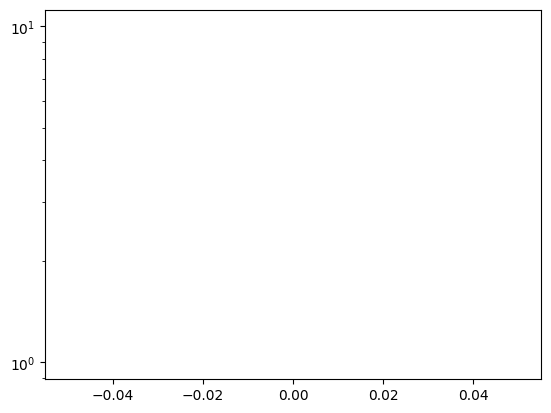

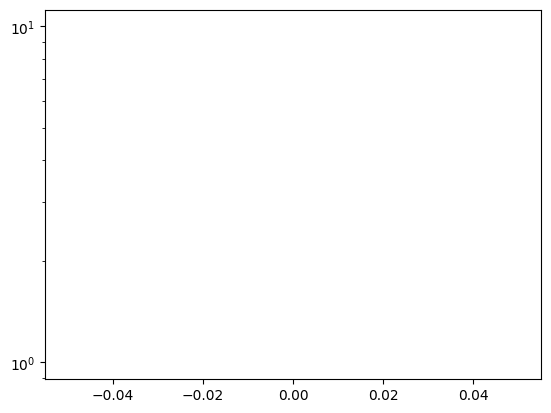

In [74]:
#Tempo
plt.yscale('log')
plt.plot(mem_used_per_graph)
plt.show()

#Memória
plt.yscale('log')
plt.plot(mem_used_per_graph)
plt.show()